In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import funcoesTermosol as ft
from APS import *

In [15]:
[nn,N,nm,Inc,nc,F,nr,R] = ft.importa('Implement.xls')
# nn = numero de nos
# N = matriz dos nos
# nm = numero de membros
# Inc = matriz de incidencia
# nc = numero de cargas
# F = vetor de carregamento
# nr = numero de restricoes
# R = vetor com os graus de liberdade restritos

In [16]:
def angulo(No1,No2):
    x_1= N[0][No1-1]
    y_1= N[1][No1-1]
    x_2= N[0][No2-1]
    y_2= N[1][No2-1]

    if x_2-x_1 == 0:
        if y_2-y_1 > 0:
            ang = 0.5*np.pi
        else:
            ang = 1.5*np.pi
    else:
        if x_2-x_1 > 0:
            ang = np.arctan((y_2-y_1)/(x_2-x_1))
        else:
            ang = np.pi + np.arctan((y_2-y_1)/(x_2-x_1))
    return ang

print(np.rad2deg(angulo(3,1)))

180.0


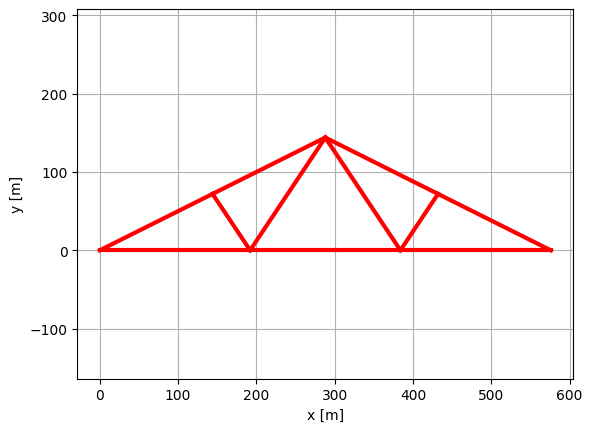

In [17]:
ft.plota(N,Inc)

In [18]:
print(Inc,"\n")
print(N,"\n")
print(R,"\n")
print(F,"\n")

[[1.0000e+00 2.0000e+00 1.9314e+11 5.2500e-04]
 [2.0000e+00 4.0000e+00 1.9314e+11 5.2500e-04]
 [4.0000e+00 6.0000e+00 1.9314e+11 5.2500e-04]
 [6.0000e+00 7.0000e+00 1.9314e+11 5.2500e-04]
 [2.0000e+00 3.0000e+00 1.9314e+11 5.2500e-04]
 [3.0000e+00 4.0000e+00 1.9314e+11 5.2500e-04]
 [4.0000e+00 5.0000e+00 1.9314e+11 5.2500e-04]
 [5.0000e+00 6.0000e+00 1.9314e+11 5.2500e-04]
 [1.0000e+00 3.0000e+00 1.9314e+11 5.2500e-04]
 [3.0000e+00 5.0000e+00 1.9314e+11 5.2500e-04]
 [5.0000e+00 7.0000e+00 1.9314e+11 5.2500e-04]] 

[[  0. 144. 192. 288. 384. 432. 576.]
 [  0.  72.   0. 144.   0.  72.   0.]] 

[[ 0.]
 [ 1.]
 [13.]] 

[[    0.]
 [    0.]
 [-1300.]
 [-1500.]
 [    0.]
 [    0.]
 [-1300.]
 [-1500.]
 [    0.]
 [    0.]
 [-1300.]
 [-1500.]
 [    0.]
 [    0.]] 



In [19]:
ks =[]
dof_indices_list = []
for i in range(0,nm):
    dof_indices_list.append([int(Inc[i][0]),int(Inc[i][1])])
    [x_1,y_1]= N[:,int(Inc[i][0])-1]
    [x_2,y_2]= N[:,int(Inc[i][1])-1]
    l = np.sqrt((x_2-x_1)**2+(y_2-y_1)**2)
    k = Inc[i][2] * Inc[i][3] / l
    print(f"Elemento {i+1}")
    print(f"x1 = {x_1},y_1 = {y_1},x_2 = {x_2},y_2 = {y_2},l = {l}")
    print(f"EA/l = {k}")
    ang = angulo(int(Inc[i][0]),int(Inc[i][1]))
    c = np.cos(ang)
    s = np.sin(ang)

    M = np.array([[c**2,c*s,-c**2,-c*s],[c*s,s**2,-c*s,-s**2],[-c**2,-c*s,c**2,c*s],[-c*s,-s**2,c*s,s**2]]) 
    ke = np.multiply(k,M)
    ks.append(ke)
    print(ke.round(2) , "\n")


Elemento 1
x1 = 0.0,y_1 = 0.0,x_2 = 144.0,y_2 = 72.0,l = 160.99689437998487
EA/l = 629816.4967125345
[[ 503853.2  251926.6 -503853.2 -251926.6]
 [ 251926.6  125963.3 -251926.6 -125963.3]
 [-503853.2 -251926.6  503853.2  251926.6]
 [-251926.6 -125963.3  251926.6  125963.3]] 

Elemento 2
x1 = 144.0,y_1 = 72.0,x_2 = 288.0,y_2 = 144.0,l = 160.99689437998487
EA/l = 629816.4967125345
[[ 503853.2  251926.6 -503853.2 -251926.6]
 [ 251926.6  125963.3 -251926.6 -125963.3]
 [-503853.2 -251926.6  503853.2  251926.6]
 [-251926.6 -125963.3  251926.6  125963.3]] 

Elemento 3
x1 = 288.0,y_1 = 144.0,x_2 = 432.0,y_2 = 72.0,l = 160.99689437998487
EA/l = 629816.4967125345
[[ 503853.2 -251926.6 -503853.2  251926.6]
 [-251926.6  125963.3  251926.6 -125963.3]
 [-503853.2  251926.6  503853.2 -251926.6]
 [ 251926.6 -125963.3 -251926.6  125963.3]] 

Elemento 4
x1 = 432.0,y_1 = 72.0,x_2 = 576.0,y_2 = 0.0,l = 160.99689437998487
EA/l = 629816.4967125345
[[ 503853.2 -251926.6 -503853.2  251926.6]
 [-251926.6  12596

In [20]:
global_stiffness_matrix = np.zeros((nn*2, nn*2))

dof_indices_list

for i in range (len(dof_indices_list)):
    dof1 = (dof_indices_list[i][0]-1)*2
    dof2 = (dof_indices_list[i][0]-1)*2+1
    dof3 = (dof_indices_list[i][1]-1)*2
    dof4 = (dof_indices_list[i][1]-1)*2+1

    global_stiffness_matrix[np.ix_([dof1,dof2,dof3,dof4],[dof1,dof2,dof3,dof4])] += ks[i]

print(global_stiffness_matrix.round(2))
print(global_stiffness_matrix.shape)
global_stiffness_matrix_uncut = global_stiffness_matrix.copy()


[[1031970.38  251926.6  -503853.2  -251926.6  -528117.19       0.
        0.         0.         0.         0.         0.         0.
        0.         0.  ]
 [ 251926.6   125963.3  -251926.6  -125963.3        0.         0.
        0.         0.         0.         0.         0.         0.
        0.         0.  ]
 [-503853.2  -251926.6  1368256.19  -36971.49 -360549.79  540824.69
  -503853.2  -251926.6        0.         0.         0.         0.
        0.         0.  ]
 [-251926.6  -125963.3   -36971.49 1063163.63  540824.69 -811237.04
  -251926.6  -125963.3        0.         0.         0.         0.
        0.         0.  ]
 [-528117.19       0.   -360549.79  540824.69 1597059.07 -270412.35
  -180274.9  -270412.35 -528117.19       0.         0.         0.
        0.         0.  ]
 [      0.         0.    540824.69 -811237.04 -270412.35 1216855.55
  -270412.35 -405618.52       0.         0.         0.         0.
        0.         0.  ]
 [      0.         0.   -503853.2  -251926.6  -180

In [21]:
u = np.zeros((nn*2,1))
dropped = 0
print(global_stiffness_matrix.shape)
print(F.shape)

for i in range (len(R)):
    global_stiffness_matrix = np.delete(global_stiffness_matrix, int(R[i][0])-dropped, 0)
    global_stiffness_matrix = np.delete(global_stiffness_matrix, int(R[i][0])-dropped, 1)
    u = np.delete(u, int(R[i][0]) - dropped, None)
    F = np.delete(F, int(R[i][0]) - dropped, None)
    dropped += 1
    

print(global_stiffness_matrix.round(2))
print(global_stiffness_matrix.shape)
print(u.shape)

(14, 14)
(14, 1)
[[1368256.19  -36971.49 -360549.79  540824.69 -503853.2  -251926.6
        0.         0.         0.         0.         0.  ]
 [ -36971.49 1063163.63  540824.69 -811237.04 -251926.6  -125963.3
        0.         0.         0.         0.         0.  ]
 [-360549.79  540824.69 1597059.07 -270412.35 -180274.9  -270412.35
  -528117.19       0.         0.         0.         0.  ]
 [ 540824.69 -811237.04 -270412.35 1216855.55 -270412.35 -405618.52
        0.         0.         0.         0.         0.  ]
 [-503853.2  -251926.6  -180274.9  -270412.35 1368256.19       0.
  -180274.9   270412.35 -503853.2   251926.6        0.  ]
 [-251926.6  -125963.3  -270412.35 -405618.52       0.   1063163.63
   270412.35 -405618.52  251926.6  -125963.3        0.  ]
 [      0.         0.   -528117.19       0.   -180274.9   270412.35
  1597059.07  270412.35 -360549.79 -540824.69 -528117.19]
 [      0.         0.         0.         0.    270412.35 -405618.52
   270412.35 1216855.55 -540824.69 -8

In [22]:
print(F)
print(F.shape)

[-1300. -1500.     0.     0. -1300. -1500.     0.     0. -1300. -1500.
     0.]
(11,)


In [23]:
result_a,max_e,i = gauss_seidel_solver(500,1e-5,global_stiffness_matrix,F)
print(result_a)
print(f"Erro max = {max_e}")
print(f"Iterações : {i}")

[ 0.01004594 -0.04311335  0.00359693 -0.04662698  0.00259644 -0.04438865
  0.00558461 -0.04637178 -0.00324337 -0.04247417  0.01164328]
Erro max = 4.188738872294173e-06
Iterações : 358


In [24]:
u_completo = np.zeros((nn*2,1))
count = 0
for i in range (nn*2):
    if i not in R:
        u_completo[i] = result_a[count]
        count += 1
        

print(u_completo)


[[ 0.        ]
 [ 0.        ]
 [ 0.01004594]
 [-0.04311335]
 [ 0.00359693]
 [-0.04662698]
 [ 0.00259644]
 [-0.04438865]
 [ 0.00558461]
 [-0.04637178]
 [-0.00324337]
 [-0.04247417]
 [ 0.01164328]
 [ 0.        ]]


In [25]:
deform = []
tens = []

for el in range(nm):
    u_1 = int(Inc[el][0]-1)*2
    v_1 = int(Inc[el][0]-1)*2+1
    u_2 = int(Inc[el][1]-1)*2
    v_2 = int(Inc[el][1]-1)*2+1

    ang = angulo(int(Inc[el][0]),int(Inc[el][1]))
    c = np.cos(ang)
    s = np.sin(ang)
    [x_1,y_1]= N[:,int(Inc[el][0])-1]
    [x_2,y_2]= N[:,int(Inc[el][1])-1]
    l = np.sqrt((x_2-x_1)**2+(y_2-y_1)**2)
    e = np.dot(np.array([-c,-s,c,s]),np.array([u_completo[u_1],u_completo[v_1],u_completo[u_2],u_completo[v_2]]))
    e = np.multiply(e,1/l)
    deform.append(e[0])
    tens.append(Inc[el][2]*e[0])

print("deslocamentos")
print(u_completo,"\n")
print("deformações")
print(deform,"\n")
print("tensões")
print((tens),"\n")
print("forças")
Fi = tens*Inc[:,3]
print(Fi)
print("reacoes")
Reac = ((np.matmul(global_stiffness_matrix_uncut,u_completo)))
for i in range (nn*2):
    if i in R:
        print(Reac[i])
    

deslocamentos
[[ 0.        ]
 [ 0.        ]
 [ 0.01004594]
 [-0.04311335]
 [ 0.00359693]
 [-0.04662698]
 [ 0.00259644]
 [-0.04438865]
 [ 0.00558461]
 [-0.04637178]
 [-0.00324337]
 [-0.04247417]
 [ 0.01164328]
 [ 0.        ]] 

deformações
[-6.394851725246424e-05, -4.492861537123129e-05, -3.7761391968810355e-05, -3.528021028075598e-05, -7.554931472286066e-06, 7.554495328030876e-06, 1.9111748700410856e-05, -1.911256490355454e-05, 1.873402884435954e-05, 1.0352458075936525e-05, 3.1555579379302935e-05] 

tensões
[-12351016.622140944, -8677512.772799611, -7293235.244856032, -6814019.81362521, -1459159.4645573308, 1459075.2276558834, 3691243.1439973526, -3691400.785472524, 3618290.330999601, 1999473.7527863805, 6094644.601318569] 

forças
[-6484.28372662 -4555.69420572 -3828.94850355 -3577.36040215
  -766.05871889   766.01449452  1937.9026506  -1937.98541237
  1899.60242377  1049.72372021  3199.68841569]
reacoes
[3900.11725548]
[2899.85983963]
[1599.84420785]


In [26]:
ft.geraSaida("saidaImplement",Reac,u_completo,deform,Fi,tens)